<b>Loading Data<b>

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import pandas as pd
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

data=pd.read_csv('train.csv')
for x in range(len(data.columns)):
    s = data.columns[x]
    if(s[0].isdigit()):
        new_name='X'+data.columns[x]
        data.rename(columns={data.columns[x]+'' : new_name+''}, inplace=True)


<b>Missing Data Visualisation<b>

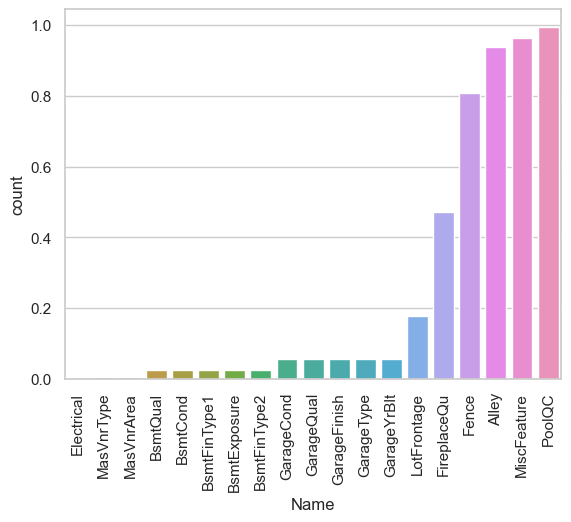

In [13]:
missing_values = data.isnull().sum() / len(data)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values=pd.DataFrame({'Name':missing_values.index, 'count':missing_values.values})
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot: >

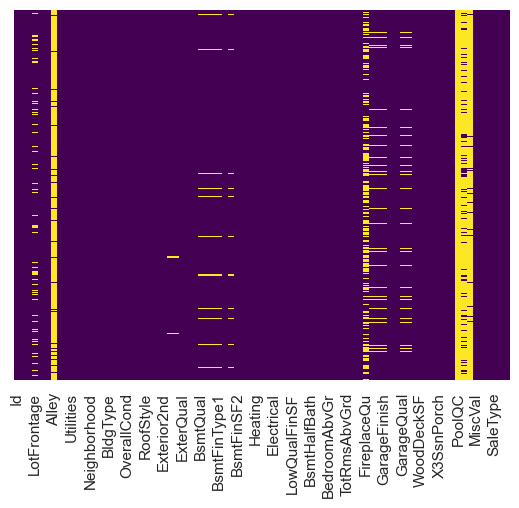

In [14]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<b>Data Cleaning<b>

In [15]:
data.drop(['Alley','MiscFeature','PoolQC','Fence','FireplaceQu','Id'], inplace=True, axis=1)
#We Dropped the columns that contain a high percentage of missing values
data.dropna()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


<b>DataSet Splitting</b>
<br><br>
We'll split data into numerical and categorical

In [16]:
quantitative = [f for f in data.columns if data.dtypes[f] != 'object']
quantitative.remove('SalePrice')
qualitative = [f for f in data.columns if data.dtypes[f] == 'object']


<b>Let's export the cleaned dataset, we'll need it later<b>

In [7]:
data.to_csv('data.csv')

<b>Checking the distribution of the sale price against the values of the qualitative(categorical) variables<b>

C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\moham\AppData\Local\Packages\PythonSoftware

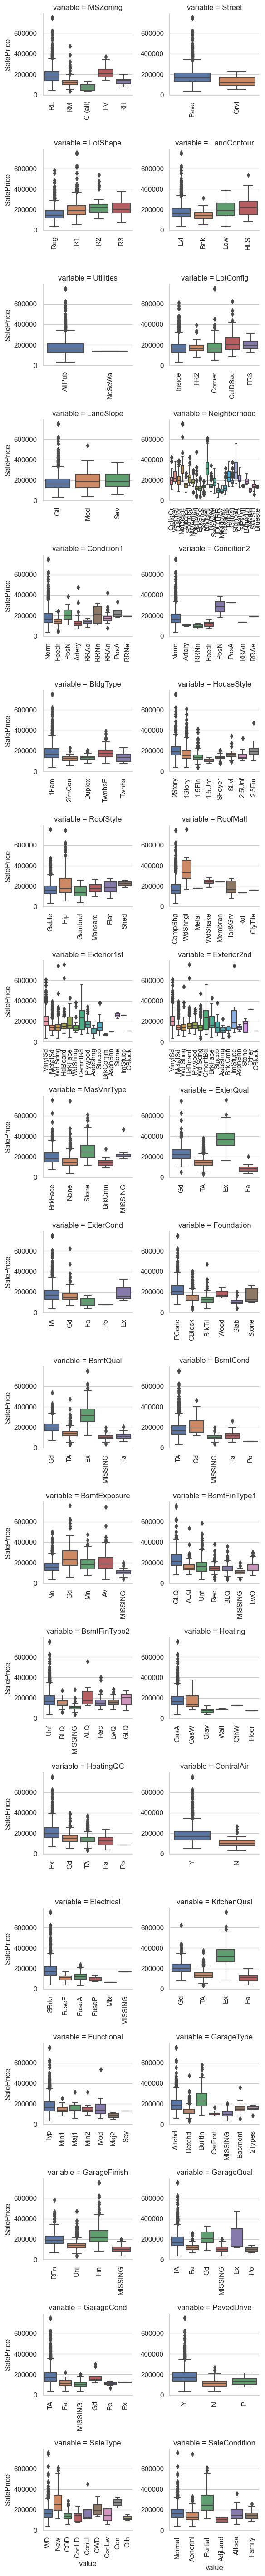

In [18]:
for c in qualitative:
    data[c] = data[c].astype('category')
    if data[c].isnull().any():
        data[c] = data[c].cat.add_categories(['MISSING'])
        data[c] = data[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(data, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(boxplot, "value", "SalePrice")

<b>ANOVA method</b>
<br><br>
Used to determine the systematic factors (factors that have a statistical influence on the dataset)

<b>ANOVA method for qualitative variables</b>

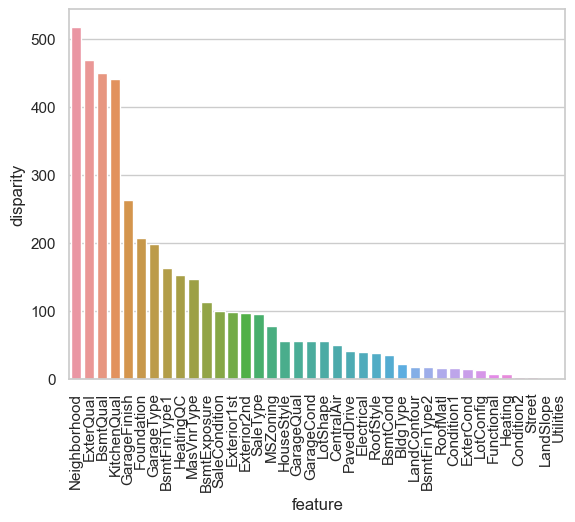

In [19]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(data)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

<b>ANOVA method for quantitative (numerical) variables</b>


C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:3869: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '
C:\Users\moham\AppData\Local\Temp\ipykernel_1164\2878170639.py:16: RuntimeWarning: divide by zero encountered in divide
  a['disparity'] = np.log(1./a['pval'].values)


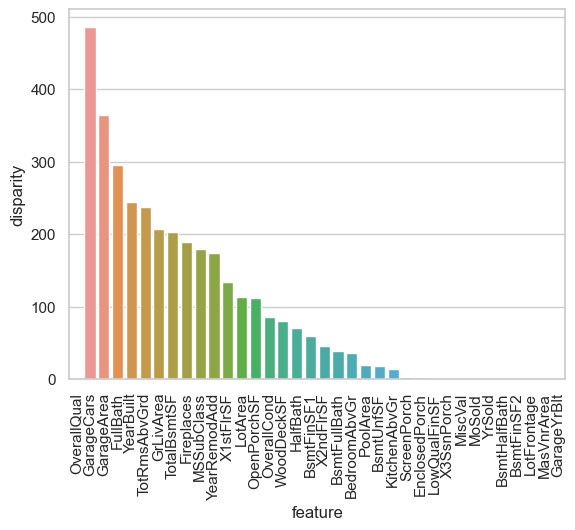

In [20]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = quantitative
    pvals = []
    for c in quantitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(data)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

<b>Let's visualise the correlations between the most important variables or factors<b>

<AxesSubplot:>

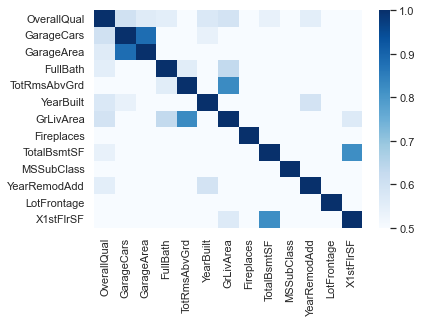

In [30]:
most_important = ['OverallQual','GarageCars','GarageArea','FullBath','TotRmsAbvGrd','YearBuilt','GrLivArea',
                'Fireplaces','TotalBsmtSF','MSSubClass','YearRemodAdd','LotFrontage','X1stFlrSF']
corr = data[most_important].corr()
sns.heatmap(corr, xticklabels=True, yticklabels=True,cmap="Blues",vmin=0.5, vmax=1)

<b>Preparing dataset for ACP<b>

In [21]:
features = ["OverallQual","GarageArea","FullBath","X1stFlrSF","TotalBsmtSF","LotFrontage","BsmtFinSF1","GrLivArea"]
ready_for_pca = data[features]
ready_for_pca.to_csv('ready_for_pca.csv')

The 2nd part of code will be coded in R language